# WeatherPy - Sarah Martin
## Analysis
1. While there is no strong correlation between humidity and latitude, humidity does have less variance around the equator.
2. Temperate increased along the equator, but does remain slightly higher in the southern hemisphere.
3. It is likely that cloudiness is reported in increments of 10. With more specific and targeted data, we may be able to see a more consistent relationship, which is not currently present.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# API URL
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url=f"{base_url}appid={weather_api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [25]:
# Create lists to hold response information
city_name=[]
temp=[]
humidity=[]
cloudiness=[]
wind=[]
country=[]
lat=[]
long=[]
date=[]

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

record=0

# Loop through each city in the cities list
for city in cities:
    
    try:
        
    # Create call and store record information in lists
        response=requests.get(query_url+city).json()
        city_name.append(response["name"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        date.append(response["dt"])

        record=record+1
        
        print(f"Processing record {record} | {city}")
        
    except:
        print("City not found. Skipping...")



-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 | mae hong son
Processing record 2 | temiscaming
Processing record 3 | ushuaia
Processing record 4 | barrow
Processing record 5 | san vicente
Processing record 6 | aklavik
Processing record 7 | yining
Processing record 8 | flinders
Processing record 9 | mahebourg
Processing record 10 | alofi
Processing record 11 | chuy
City not found. Skipping...
Processing record 12 | cape town
Processing record 13 | sosnovoborsk
Processing record 14 | arraial do cabo
Processing record 15 | yellowknife
Processing record 16 | butaritari
Processing record 17 | mount isa
Processing record 18 | juan lacaze
City not found. Skipping...
Processing record 19 | hithadhoo
Processing record 20 | rio gallegos
Processing record 21 | nishihara
Processing record 22 | gustrow
Processing record 23 | port alfred
Processing record 24 | kapaa
Processing record 25 | atuona
Processing record 26 | teluk nibung
Processin

Processing record 231 | vila franca do campo
Processing record 232 | egvekinot
Processing record 233 | nanortalik
Processing record 234 | coos bay
Processing record 235 | dunedin
Processing record 236 | naruja
Processing record 237 | kumbo
Processing record 238 | avarua
Processing record 239 | mkushi
Processing record 240 | tiarei
Processing record 241 | karatau
Processing record 242 | tukrah
Processing record 243 | faya
Processing record 244 | jiaonan
Processing record 245 | hazaribag
Processing record 246 | uige
Processing record 247 | jamalpur
Processing record 248 | bathsheba
Processing record 249 | ust-nera
Processing record 250 | chute-aux-outardes
Processing record 251 | whitehorse
Processing record 252 | srandakan
Processing record 253 | eureka
Processing record 254 | tasiilaq
Processing record 255 | constitucion
Processing record 256 | pangnirtung
Processing record 257 | klaksvik
City not found. Skipping...
Processing record 258 | beringovskiy
Processing record 259 | asau
Proc

Processing record 461 | ballina
Processing record 462 | tabas
Processing record 463 | ca mau
Processing record 464 | tignere
Processing record 465 | lorengau
Processing record 466 | bow island
Processing record 467 | bonthe
Processing record 468 | shepsi
Processing record 469 | huambo
Processing record 470 | sri aman
Processing record 471 | voloshka
Processing record 472 | pilar
Processing record 473 | orodara
Processing record 474 | benguela
Processing record 475 | harper
Processing record 476 | palu
Processing record 477 | sovetskiy
Processing record 478 | seguin
Processing record 479 | saint-augustin
Processing record 480 | placido de castro
Processing record 481 | terenos
Processing record 482 | almeida
Processing record 483 | pangody
Processing record 484 | bossangoa
Processing record 485 | rancho palos verdes
Processing record 486 | matagami
Processing record 487 | kurilsk
Processing record 488 | penzance
Processing record 489 | illapel
Processing record 490 | porto novo
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict={"City":city_name,
              "Lat":lat,
              "Lng":long,
              "Max Temp":temp,
              "Humidity":humidity,
              "Cloudiness":cloudiness,
              "Wind Speed":wind,
              "Country":country,
              "Date":date}

weather_df=pd.DataFrame(weather_dict)
weather_df.to_csv("Output/weather_data.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mae Hong Son,19.30,97.97,73.83,88,98,1.05,TH,1591734859
1,Témiscaming,46.72,-79.10,77.00,53,75,8.05,CA,1591734859
2,Ushuaia,-54.80,-68.30,41.00,87,75,2.75,AR,1591735199
3,Barrow,71.29,-156.79,30.20,80,90,5.82,US,1591735079
4,San Vicente,-26.62,-54.13,66.20,100,85,1.99,AR,1591734859
...,...,...,...,...,...,...,...,...,...
562,Lanzhou,36.06,103.79,63.00,31,100,1.21,CN,1591734918
563,Mocuba,-16.84,36.99,63.93,97,30,0.98,MZ,1591734919
564,Ambilobe,-13.20,49.05,66.69,80,8,3.98,MG,1591735253
565,Isangel,-19.55,169.27,71.60,94,20,16.58,VU,1591734919


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

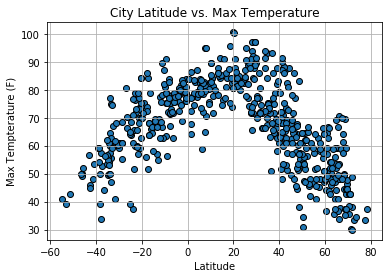

In [77]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Tempterature (F)")
plt.grid(True)
plt.savefig("Output/LatvsTemp.png")
plt.show()

##### there is a strong increase in temperature around the equator. This is a strong indication of the earth's spherical shape.

## Latitude vs. Humidity Plot

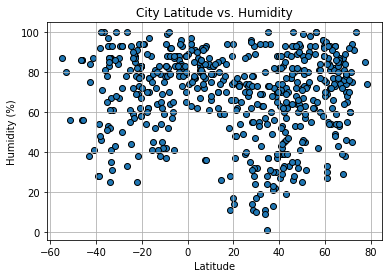

In [76]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Output/LatvsHumidity.png")
plt.show()

##### There seems to be a smaller variance of humidity around the equator.

## Latitude vs. Cloudiness Plot

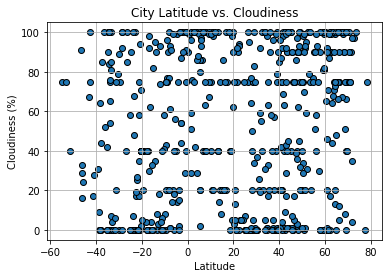

In [75]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Output/LatvsCloudiness.png")
plt.show()

##### Little to no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

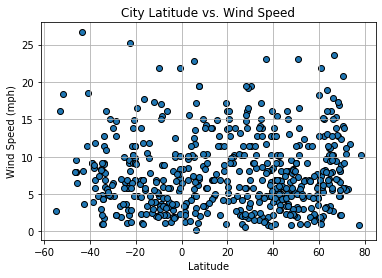

In [74]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Output/LatvsWind.png")
plt.show()

##### Little to no correlation between latitude and wind speed

## Linear Regression

In [78]:
# Create linear regression plot function
def regression(x_value, y_value):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    plt.plot(x_value,regress_values,'b-')

In [68]:
# Create Northern and Southern Hemisphere DataFrames
north_df=weather_df.loc[weather_df["Lat"]>=0]
south_df=weather_df.loc[weather_df["Lat"]<0]
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mae Hong Son,19.30,97.97,73.83,88,98,1.05,TH,1591734859
1,Témiscaming,46.72,-79.10,77.00,53,75,8.05,CA,1591734859
3,Barrow,71.29,-156.79,30.20,80,90,5.82,US,1591735079
5,Aklavik,68.22,-135.01,44.60,81,90,12.75,CA,1591734860
6,Yining,29.04,114.56,75.42,93,100,1.77,CN,1591734860
...,...,...,...,...,...,...,...,...,...
558,Varangaon,21.02,75.90,86.32,61,0,12.82,IN,1591734918
560,Karaman Province,37.08,33.25,65.64,30,96,7.76,TR,1591735253
561,Bambari,5.77,20.68,73.49,86,96,2.44,CF,1591734918
562,Lanzhou,36.06,103.79,63.00,31,100,1.21,CN,1591734918


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

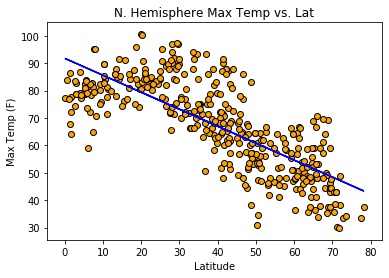

In [81]:
# Establish data and specify regression
north_temp=north_df["Max Temp"]
north_lat=north_df["Lat"]
regression(north_lat,north_temp)

# Plot the data and set labels
plt.scatter(north_lat,north_temp,edgecolors="black",color="orange")
plt.title("N. Hemisphere Max Temp vs. Lat")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("Output/North_LatvsTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

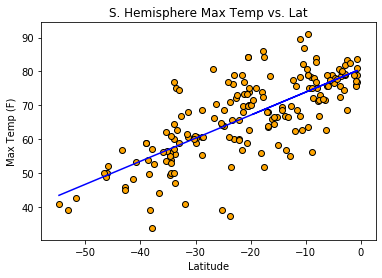

In [82]:
# Establish data and specify regression
south_temp=south_df["Max Temp"]
south_lat=south_df["Lat"]
regression(south_lat,south_temp)

# Plot the data and set labels
plt.scatter(south_lat,south_temp,edgecolors="black",color="orange")
plt.title("S. Hemisphere Max Temp vs. Lat")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.savefig("Output/South_LatvsTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

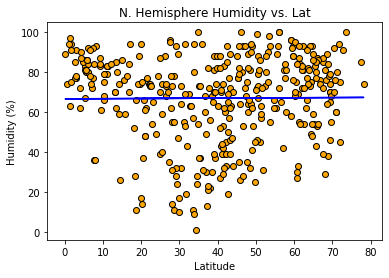

In [92]:
# Establish data and specify regression
north_humidity=north_df["Humidity"]
north_lat=north_df["Lat"]
regression(north_lat,north_humidity)

# Plot the data and set labels
plt.scatter(north_lat,north_humidity,edgecolors="black",color="orange")
plt.title("N. Hemisphere Humidity vs. Lat")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Output/North_LatvsHumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

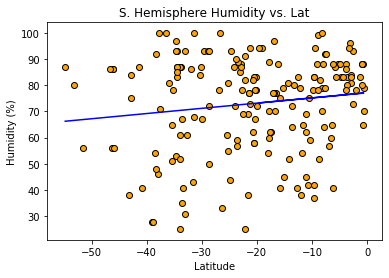

In [93]:
# Establish data and specify regression
south_humidity=south_df["Humidity"]
south_lat=south_df["Lat"]
regression(south_lat,south_humidity)

# Plot the data and set labels
plt.scatter(south_lat,south_humidity,edgecolors="black",color="orange")
plt.title("S. Hemisphere Humidity vs. Lat")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Output/South_LatvsHumidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

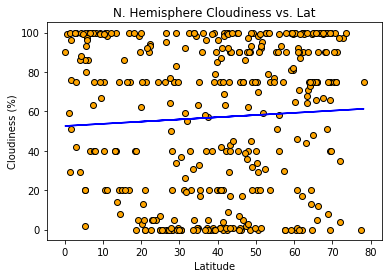

In [97]:
# Establish data and specify regression
north_cloudiness=north_df["Cloudiness"]
north_lat=north_df["Lat"]
regression(north_lat,north_cloudiness)

# Plot the data and set labels
plt.scatter(north_lat,north_cloudiness,edgecolors="black",color="orange")
plt.title("N. Hemisphere Cloudiness vs. Lat")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Output/North_LatvsCloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

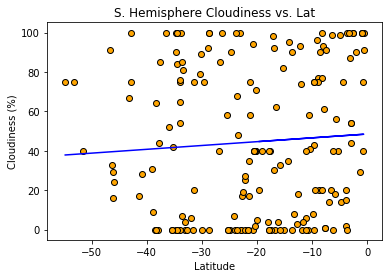

In [96]:
# Establish data and specify regression
south_cloudiness=south_df["Cloudiness"]
south_lat=south_df["Lat"]
regression(south_lat,south_cloudiness)

# Plot the data and set labels
plt.scatter(south_lat,south_cloudiness,edgecolors="black",color="orange")
plt.title("S. Hemisphere Cloudiness vs. Lat")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Output/South_LatvsCloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

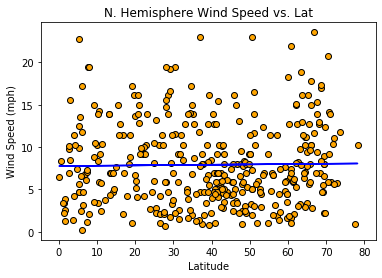

In [99]:
# Establish data and specify regression
north_wind=north_df["Wind Speed"]
north_lat=north_df["Lat"]
regression(north_lat,north_wind)

# Plot the data and set labels
plt.scatter(north_lat,north_wind,edgecolors="black",color="orange")
plt.title("N. Hemisphere Wind Speed vs. Lat")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Output/North_LatvsWindSpeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

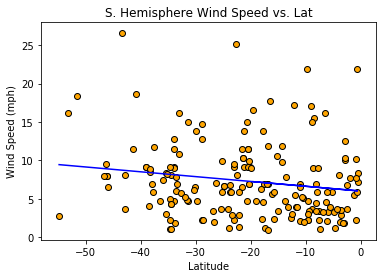

In [100]:
# Establish data and specify regression
south_wind=south_df["Wind Speed"]
south_lat=south_df["Lat"]
regression(south_lat,south_wind)

# Plot the data and set labels
plt.scatter(south_lat,south_wind,edgecolors="black",color="orange")
plt.title("S. Hemisphere Wind Speed vs. Lat")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Output/South_LatvsWindSpeed.png")
plt.show()